In [139]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math

import plotly.express as px
import altair as alt

In [56]:
df = pd.read_csv("./us_states.csv")

In [257]:
# Create a mapping file using the US Census Bureau recommendation into 4 regions: Northeast,  Midwest, South, West. 

mapping = {
"Maine":"Northeast",
"New Hampshire":"Northeast",
"Vermont":"Northeast",
"Massachusetts":"Northeast",
"Rhode Island":"Northeast",
"Connecticut":"Northeast",
"New York":"Northeast",
"New Jersey":"Northeast",
"Pennsylvania":"Northeast",
"Ohio":"Midwest",
"Michigan":"Midwest",
"Indiana":"Midwest",
"Wisconsin":"Midwest",
"Illinois":"Midwest",
"Minnesota":"Midwest",
"Iowa":"Midwest",
"Missouri":"Midwest",
"North Dakota":"Midwest",
"South Dakota":"Midwest",
"Nebraska":"Midwest",
"Kansas":"Midwest",
"Delaware":"South",
"Maryland":"South",
"Virginia":"South",
"West Virginia":"South",
"Kentucky":"South",
"North Carolina":"South",
"South Carolina":"South",
"Tennessee":"South",
"Georgia":"South",
"Florida":"South",
"Alabama":"South",
"Mississippi":"South",
"Arkansas":"South",
"Louisiana":"South",
"Texas":"South",
"Oklahoma":"South",
"Montana":"West",
"Idaho":"West",
"Wyoming":"West",
"Colorado":"West",
"New Mexico":"West",
"Arizona":"West",
"Utah":"West",
"Nevada":"West",
"California":"West",
"Oregon":"West",
"Washington":"West",
"Alaska":"West",
"Hawaii":"West",
"District of Columbia":"Non-official US States",
"Guam":"Non-official US States",
"Northern Mariana Islands":"Non-official US States",
"Puerto Rico":"Non-official US States",
"Virgin Islands":"Non-official US States",
}

In [258]:
# Apply the mapping filed from states to region
df['state_mapped'] = df['state'].replace(mapping)

In [259]:
#conver the cases to log scale
df['cases_log_scale'] = df['cases'].apply(lambda x: math.log10(x))

#conver the deaths to log scale
df['deaths_log_scale'] = df['deaths'].apply(lambda x: math.log10(x))

In [271]:
df.head(10);

## Which region of the US has the most COVID cases and most COVID deaths in total

**Number of Cases**
- From looking at the chart 1 below, the South seems to have the most COVID cases. It has about $10^{20}$ more cases than the West
- The West and Midwest have similar amount of Covid cases
- The 5 non-official US states ("District of Columbia","Guam","Northern Mariana Islands","Puerto Rico","Virgin Islands") have the least covid cases.

**Number of Deaths**
- The South still is the region with the highest sum of COVID death, while the 5 non-official US states have the least covid cases.
- Interestingly, although West has more cases than Midwest, Midwest has more COVID related deaths than the West. 

**Comparing the Number of Deaths and Cases**
- Comparing the cases and deaths by region, it doesn't seem like all COVID cases are lethal, meaning not all patients with COVID would die. 


In [266]:
sumdf = (
         df.groupby(by=["state_mapped"])["deaths_log_scale","cases_log_scale"].agg({"sum"}).stack(level=1)
         .reset_index()
         .drop("level_1", axis = 1)
        );

<ipython-input-266-f01da72d047f>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby(by=["state_mapped"])["deaths_log_scale","cases_log_scale"].agg({"sum"}).stack(level=1)


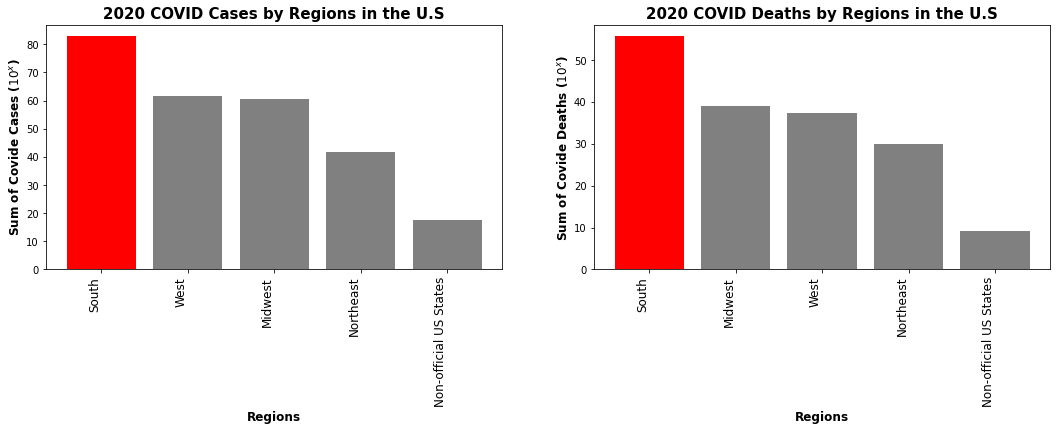

In [267]:
#pre-configuring
fig, ax = plt.subplots(ncols = 2, figsize = (18,5))
fig.autofmt_xdate(rotation=90)

#plot cases
ax[0].bar(data = sumdf.sort_values(by = "cases_log_scale", ascending = False),
             x = "state_mapped",
             height= "cases_log_scale",
             color = ["red","grey","grey","grey","grey"],
            )

#plot deatus
ax[1].bar(data = sumdf.sort_values(by = "deaths_log_scale", ascending = False),
             x = "state_mapped",
             height= "deaths_log_scale",
             color = ["red","grey","grey","grey","grey"],
            )

#labeling
ax[0].set_title("2020 COVID Cases by Regions in the U.S", fontweight = "bold", size = 15);
ax[0].set_xlabel("Regions", size = 12, fontweight = "bold");
ax[0].set_ylabel("Sum of Covide Cases ($10^x$)", size =12, fontweight = "bold");

ax[1].set_title("2020 COVID Deaths by Regions in the U.S", fontweight = "bold", size = 15);
ax[1].set_xlabel("Regions", size = 12, fontweight = "bold");
ax[1].set_ylabel("Sum of Covide Deaths ($10^x$)", size =12, fontweight = "bold");




plt.show()

## What is the relationship between number of deaths and cases?

- There is seems to be a positive linear relationship between deaths and cases for COVID in the Northeast, as indicated by the orange color. As the number of cases goes up, the number of deaths goes up
- There is a cluster identified in the region encapsulated by (0,0) and (400000,10000) for COVID cases and deaths in the Midwest, as indicated by the light blue color
- The extreme COVID cases (> 800,000) were coming from the South and the West, as indicated by the light green and dark green colors
- Interesting, in Northeast regions, the deaths reached of over 15,000 with only ~200,000 cases . The same amount of deaths would requires >700,000 cases in the South and West Region

In [270]:
alt.Chart(df).mark_point().encode(
    x = "cases",
    y = "deaths",
    color = "state_mapped"
).interactive()

alt.Chart(...)